In [5]:
from import_RNA import *

In [6]:
import warnings

warnings.filterwarnings('ignore')

# Set up datasets

In [2]:
WD10d = sc.read_h5ad('h5ads/P22-10dWD_gaba_v2.h5ad').concatenate(sc.read_h5ad('h5ads/P22-10dWD_glut_v2.h5ad'),
                                                            batch_key='Class', batch_categories=['GABAergic',
                                                                                                'Glutamatergic'])
P22 = sc.read_h5ad('h5ads/P22Sham_gaba_v2.h5ad').concatenate(sc.read_h5ad('h5ads/P22Sham_glut_v2.h5ad'),
                                                            batch_key='Class', batch_categories=['GABAergic',
                                                                                                'Glutamatergic'])


/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [4]:
suffix = "_P22-10dWD"
WD10d_subs = [item + suffix for item in list(WD10d.obs.Subclass)]
WD10d.obs['Subclass_age'] = pd.Categorical(WD10d_subs)

suffix = "_P22"
P22_subs = [item + suffix for item in list(P22.obs.Subclass)]
P22.obs['Subclass_age'] = pd.Categorical(P22_subs)

In [5]:
WD10d.X = WD10d.raw.X
P22.X = P22.raw.X
pipeline_short(WD10d, batch_correct=True, batch_ID='Sample')
pipeline_short(P22, batch_correct=True, batch_ID='Sample')

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
Reach convergence after 5 iteration(s).


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
Reach convergence after 7 iteration(s).


sc.set_figure_params(dpi=100)

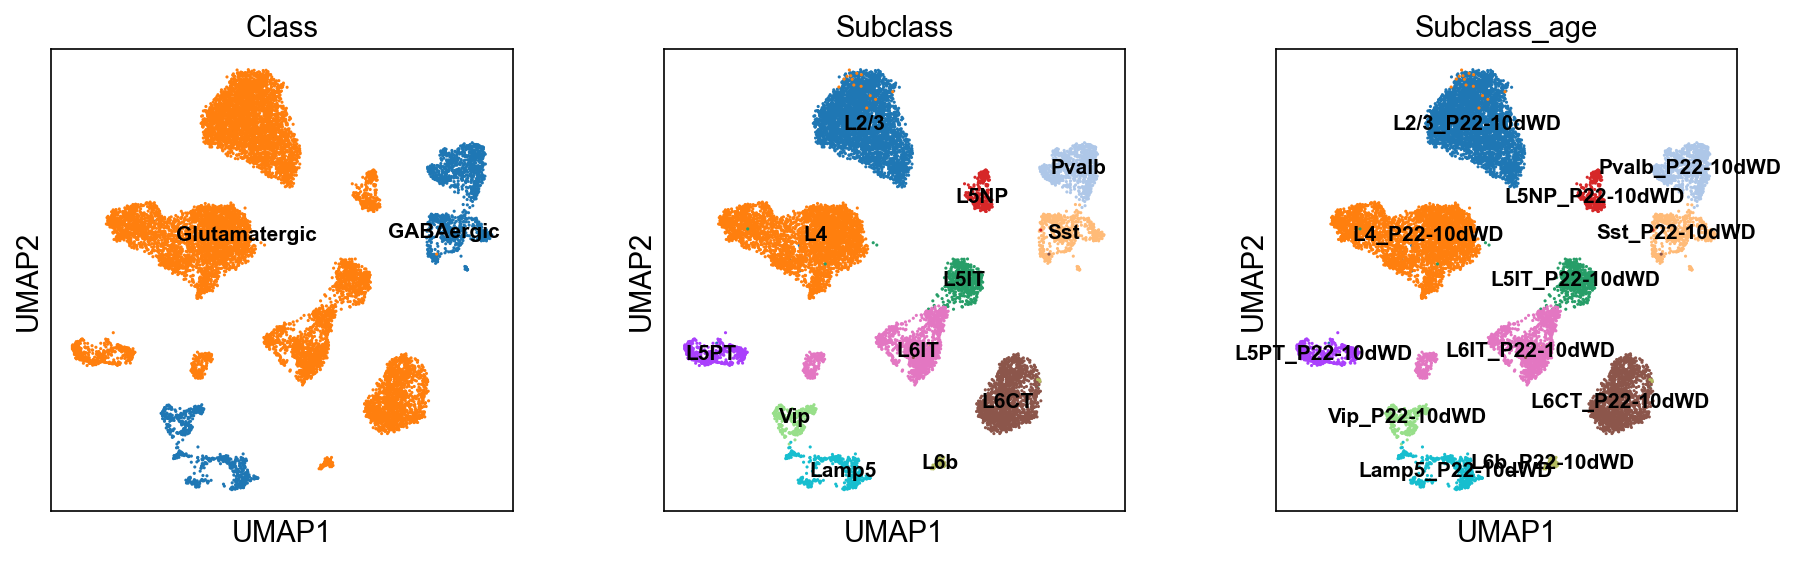

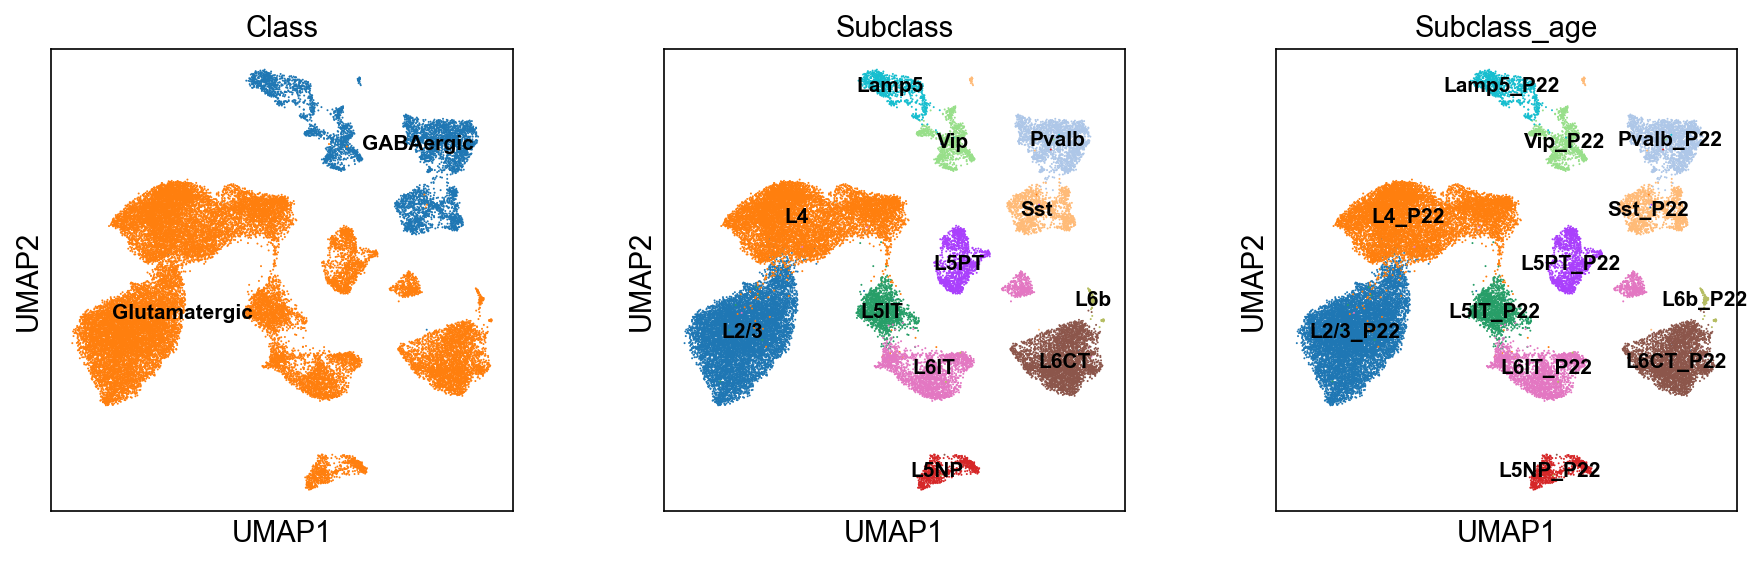

In [6]:
sc.pl.umap(WD10d, color=['Class', 'Subclass', 'Subclass_age'], legend_loc='on data', legend_fontsize=10)
sc.pl.umap(P22, color=['Class', 'Subclass', 'Subclass_age'], legend_loc='on data', legend_fontsize=10)

In [7]:
WD10d.shape

(13235, 21258)

In [8]:
WD10d_glut = WD10d[WD10d.obs.Class=='Glutamatergic',:]
WD10d_gaba = WD10d[WD10d.obs.Class=='GABAergic',:]

P22_glut = P22[P22.obs.Class=='Glutamatergic',:]
P22_gaba = P22[P22.obs.Class=='GABAergic',:]

gluta = WD10d_glut.concatenate(P22_glut, batch_categories=['P22-10dWD', 'P22'])
gaba = WD10d_gaba.concatenate(P22_gaba, batch_categories=['P22-10dWD', 'P22'])

/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [9]:
gluta.obs['Condition'] = gluta.obs['batch'] 
gaba.obs['Condition'] = gaba.obs['batch'] 


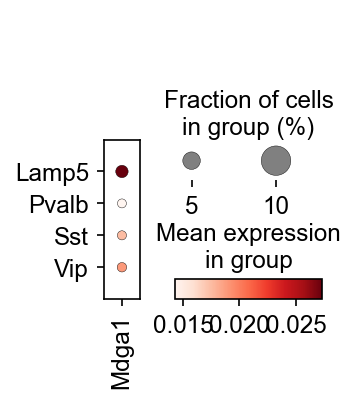

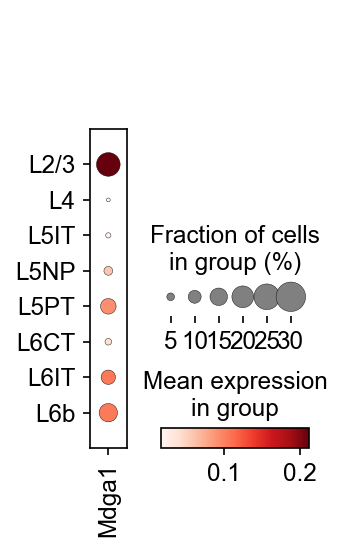

In [10]:
sc.pl.dotplot(gaba, 'Mdga1', groupby='Subclass') #makes everything categorical
sc.pl.dotplot(gluta, 'Mdga1', groupby='Subclass') #makes everything categorical

#have to remove a bunch of reses that have NaNs
del gluta.obs['leiden_0.25']
del gaba.obs['leiden_0.25']

gluta.write_h5ad('h5ads/gluta_P22-10dWD+P22_DEready.h5ad')
gaba.write_h5ad('h5ads/gaba_P22-10dWD+P22_DEready.h5ad')

In [11]:
gluta.obs.Subclass.value_counts()

L2/3    13285
L4      12861
L6CT     4842
L6IT     3661
L5IT     2064
L5PT     1671
L5NP      974
L6b       194
Name: Subclass, dtype: int64

In [12]:
gluta.obs.Type.value_counts()

L2/3_B       6705
L4_A         6056
L4_B         3583
L2/3_C       3508
L2/3_A       3072
L4_C         2960
L6CT_B       2659
L5IT         2029
L6IT_A       1807
L6CT_C       1534
L6IT_B        797
L5NP_A        614
L6IT_C        549
L6IT_Car3     543
L6CT_A        526
L5PT_A        499
L5PT_B        424
L5PT_C        337
L5NP_B        298
L4_D          262
L6b           194
L5PT_D        136
L5PT_E        128
L6CT_D         87
L5PT_F         76
L5PT_G         71
L5NP_C         62
L6CT_E         36
Name: Type, dtype: int64

In [13]:
gaba.obs.Type.value_counts()

Pvalb_A    798
Pvalb_B    752
Lamp5_A    682
Vip_A      452
Pvalb_D    372
Pvalb_C    363
Pvalb_E    277
Sst_A      276
Sst_B      260
Sst_C      246
Vip_B      240
Lamp5_B    226
Sst_D      224
Sst_E      212
Vip_C      189
Sst_F      170
Sst_G      163
Lamp5_C    148
Sst_H      142
Vip_D      135
Vip_E      123
Lamp5_D    118
Sst_I       84
Sst_J       61
Pvalb_F     52
Vip_G       48
Vip_F       42
Sst_K       17
Lamp5_E     13
Pvalb_G     11
Pvalb_H      9
Name: Type, dtype: int64

In [14]:
gaba.obs.Subclass.value_counts()

Pvalb    2634
Sst      1855
Lamp5    1235
Vip      1181
Name: Subclass, dtype: int64

# All subclasses

## Prep data

In [7]:
gluta = sc.read_h5ad('h5ads/gluta_P22-10dWD+P22_DEready.h5ad')
gaba = sc.read_h5ad('h5ads/gaba_P22-10dWD+P22_DEready.h5ad')

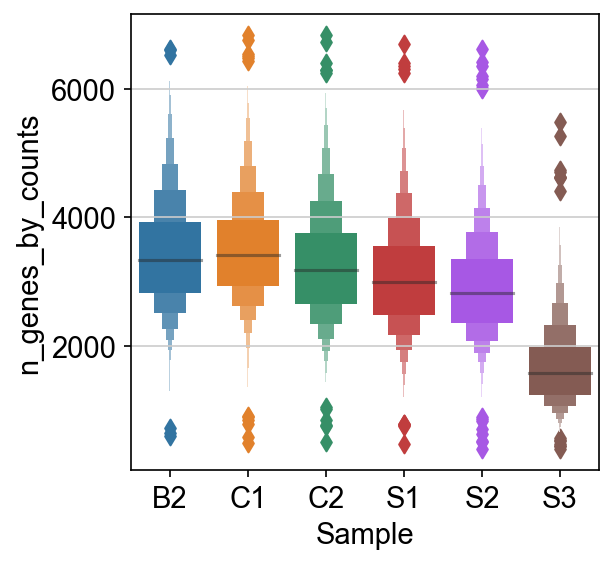

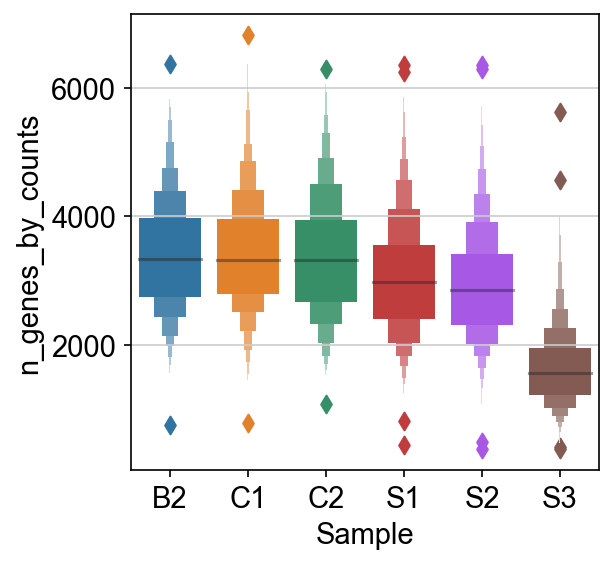

In [8]:
sn.boxenplot(data=gluta.obs, x='Sample', y='n_genes_by_counts')
plt.show()
sn.boxenplot(data=gaba.obs, x='Sample', y='n_genes_by_counts')

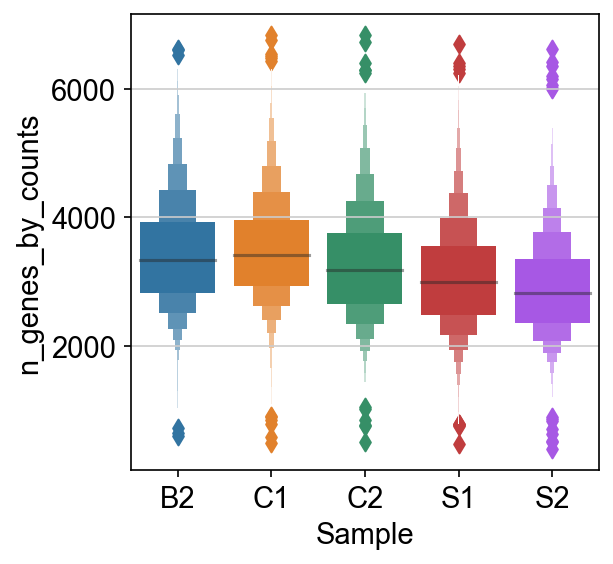

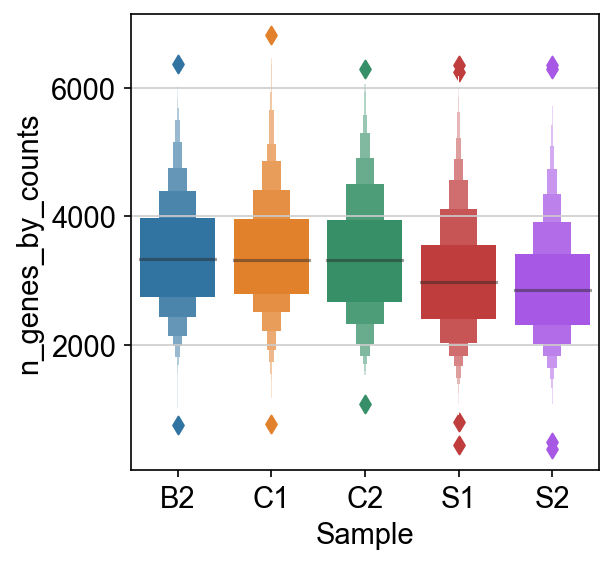

In [9]:
gluta = gluta[gluta.obs.Sample!='S3'].copy()
gaba = gaba[gaba.obs.Sample!='S3'].copy()

sn.boxenplot(data=gluta.obs, x='Sample', y='n_genes_by_counts')
plt.show()
sn.boxenplot(data=gaba.obs, x='Sample', y='n_genes_by_counts')

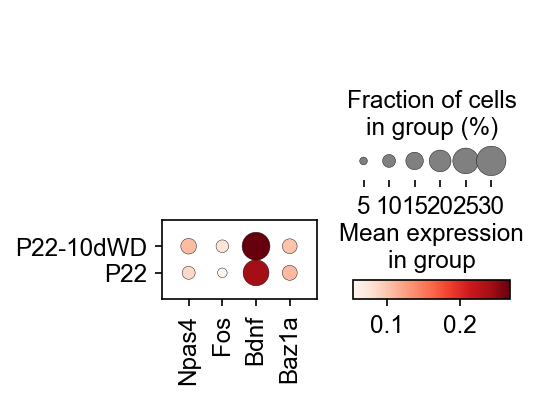

In [10]:
sc.pl.dotplot(gluta[gluta.obs.Subclass=='L2/3',:],['Npas4', 'Fos','Bdnf', 'Baz1a'], 'Condition')

In [11]:
gluta.raw.X

<32098x21258 sparse matrix of type '<class 'numpy.float32'>'
	with 102251213 stored elements in Compressed Sparse Row format>

In [12]:
gluta = gluta.copy()

In [13]:
gluta.X = gluta.raw.X

In [14]:
print(gluta.shape)
gluta = gluta[:,~gluta.var_names.str.startswith('Rp')].copy()
gluta = gluta[:,~gluta.var_names.str.startswith('mt')].copy()
gluta = gluta[:,~gluta.var_names.str.startswith('Gm')].copy()
gluta = gluta[:,~gluta.var_names.str.startswith('AC')].copy()

print(gluta.shape)

(32098, 21258)
(32098, 17285)


In [15]:
gluta.raw = gluta

In [16]:
gluta.raw.X

<32098x17285 sparse matrix of type '<class 'numpy.float32'>'
	with 96438007 stored elements in Compressed Sparse Row format>

In [17]:
gaba = gaba.copy()
gaba.X = gaba.raw.X

In [18]:
print(gaba.shape)
gaba = gaba[:,~gaba.var_names.str.startswith('Rp')].copy()
gaba = gaba[:,~gaba.var_names.str.startswith('mt')].copy()
gaba = gaba[:,~gaba.var_names.str.startswith('Gm')].copy()
gaba = gaba[:,~gaba.var_names.str.startswith('AC')].copy()

print(gaba.shape)

(5697, 21258)
(5697, 17285)


In [19]:
gaba.raw = gaba

In [20]:
gaba.raw.X

<5697x17285 sparse matrix of type '<class 'numpy.float32'>'
	with 17110512 stored elements in Compressed Sparse Row format>

In [21]:
gluta.obs['batch'].value_counts(), gaba.obs['batch'].value_counts()

(P22          20880
 P22-10dWD    11218
 Name: batch, dtype: int64,
 P22          3680
 P22-10dWD    2017
 Name: batch, dtype: int64)

## Run DE

In [22]:
def DE(adata, obs_id, obs_id_test, ref, pts_thresh, lf_thresh):

    sc.tl.rank_genes_groups(adata, groupby=obs_id, groups=[obs_id_test], 
                                reference=ref, method='t-test', pts=True, use_raw=True)

    lfcs = adata.uns['rank_genes_groups']['logfoldchanges'].astype([(obs_id_test, '<f8')]).view('<f8') 

    l231_genes = adata.uns['rank_genes_groups']['pts']

    lfcs = []
    p_adj = []
    names = list(adata.uns['rank_genes_groups']['names'].astype([(obs_id_test, '<U50')]).view('<U50'))
    logfoldchanges = adata.uns['rank_genes_groups']['logfoldchanges'].astype([(obs_id_test, '<f8')]).view('<f8')
    pvals_adj = adata.uns['rank_genes_groups']['pvals_adj'].astype([(obs_id_test, '<f8')]).view('<f8')

    for i in l231_genes.index:
        lfcs.append(logfoldchanges[names.index(i)])
        p_adj.append(pvals_adj[names.index(i)])

    l231_genes['LF'] = lfcs
    l231_genes['p_adj'] = p_adj
    
    #plt.hist(l231_genes[obs_id_test].values)

    l231_genes = l231_genes[l231_genes[obs_id_test]>pts_thresh]
    
    sort_LF = l231_genes.sort_values('LF', ascending=False)
    
    a = np.where(sort_LF[sort_LF['LF']>0.6]['p_adj'].values<0.05)[0].shape[0]
    b = sort_LF[sort_LF['LF']>0.6].shape[0]
    if(a == b):
        print('cutoffs are good at 1.5 FC level')
    else:
        print(a,b)
        
    return sort_LF[sort_LF['LF']>lf_thresh]

In [23]:
gluta_dict_WD10d = dict()
for i in ['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',]:
    df = DE(gluta[gluta.obs['Subclass']==i,:], obs_id='batch', 
                               obs_id_test='P22-10dWD', ref='rest', pts_thresh=0.4, lf_thresh=1)
    #df = df[df['LF']<4]
    gluta_dict_WD10d[i+'_WD10d'] = df[df['p_adj']<0.05]
    #gluta_dict_WD10d[i+'_WD10d'] = df

del df
gluta_dict_P22 = dict()
for i in ['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',]:

    df = DE(gluta[gluta.obs['Subclass']==i,:], obs_id='batch', 
                              obs_id_test='P22', ref='rest', pts_thresh=0.4, lf_thresh=1)
    
    #df = df[df['LF']<4]
    gluta_dict_P22[i+'_P22'] = df[df['p_adj']<0.05]
    #gluta_dict_P22[i+'_P22'] = df

cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
35 44
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
24 303
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
4 86


In [24]:
gaba_dict_WD10d = dict()
for i in ['Pvalb', 'Sst', 'Vip', 'Lamp5']:
    df = DE(gaba[gaba.obs['Subclass']==i,:], obs_id='batch', 
                               obs_id_test='P22-10dWD', ref='rest', pts_thresh=0.4, lf_thresh=1)
    #df = df[df['LF']<4]
    gaba_dict_WD10d[i+'_WD10d'] = df[df['p_adj']<0.05]
    #gaba_dict_WD10d[i+'_WD10d'] = df
    
del df

gaba_dict_P22 = dict()
for i in ['Pvalb', 'Sst', 'Vip', 'Lamp5']:
    df = DE(gaba[gaba.obs['Subclass']==i,:], obs_id='batch', 
                              obs_id_test='P22', ref='rest', pts_thresh=0.4, lf_thresh=1)  
    #df = df[df['LF']<4]
    gaba_dict_P22[i+'_P22'] = df[df['p_adj']<0.05]
    #gaba_dict_P22[i+'_P22'] = df

cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
68 69
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level


## Diagnose WD10d>P22 and P22>WD10d

If these plots all overlap, that means there's no subclass-specific bias driving any subclass-specific DE results below

In [78]:
def three_cdfs(dict_in,cond):  
    fig, axs = plt.subplots(1,3, figsize=(15,4))
    dict_in_sizes = []
    for i in dict_in.keys():
        dict_in_sizes.append(dict_in[i].shape[0])
        #sn.kdeplot(dict_in[i][cond], label=i, cumulative=True, ax=axs[0])   
        axs[0].scatter(dict_in[i].sort_values(cond, ascending=False)['LF'],
            dict_in[i].sort_values(cond, ascending=False)[cond],  label=i)
        #axs[0].loglog()
        axs[0].legend(bbox_to_anchor=(1,1))
        axs[0].set_ylabel('Fraction of cells exp in '+cond)
        axs[0].set_xlabel('LF')


    for i in dict_in.keys():
        sn.kdeplot(dict_in[i]['LF'], label=i, cumulative=True, ax=axs[1]) 
    axs[1].legend()
    axs[1].set_xlabel('log2FC in '+cond)


    for i in dict_in.keys():
        sn.kdeplot(dict_in[i]['p_adj'], label=i, cumulative=True, ax=axs[2])
    axs[2].legend()
    axs[2].set_xlabel('p_adj in '+cond)

    plt.tight_layout()

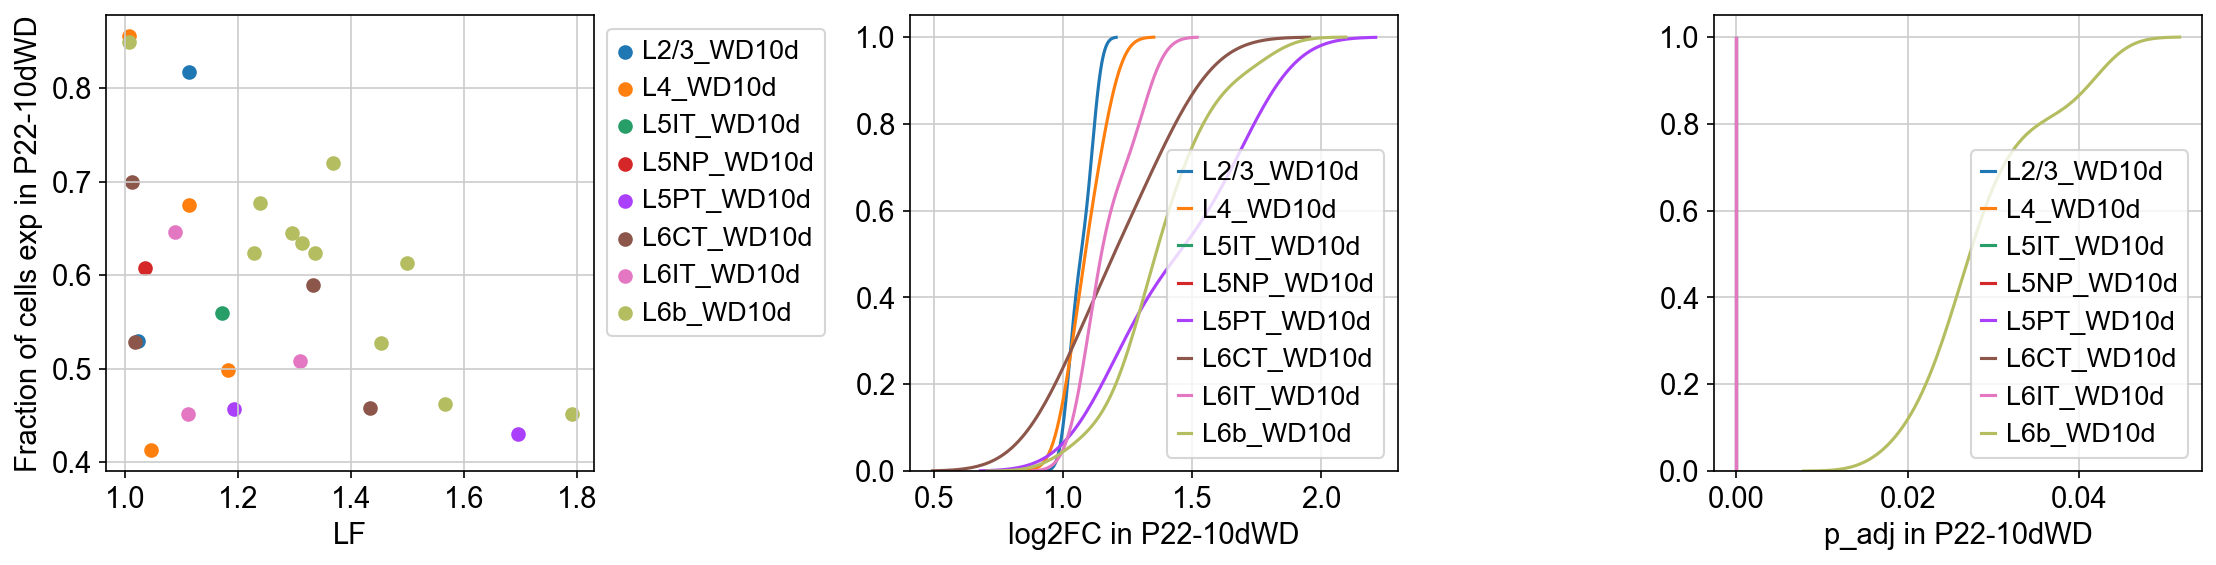

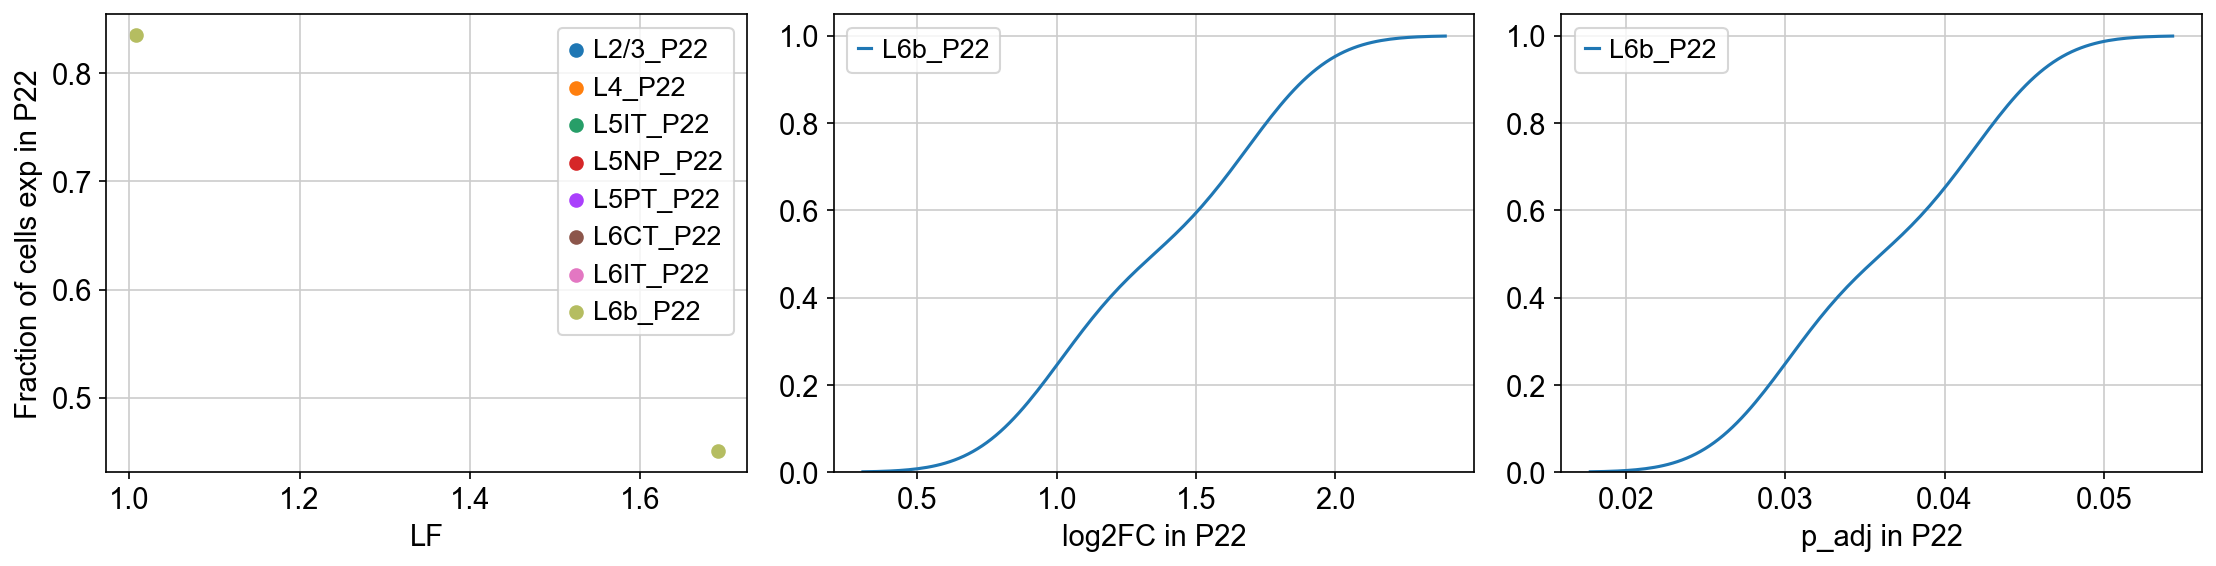

In [79]:
three_cdfs(dict_in=gluta_dict_WD10d, cond='P22-10dWD')
three_cdfs(dict_in=gluta_dict_P22, cond='P22')

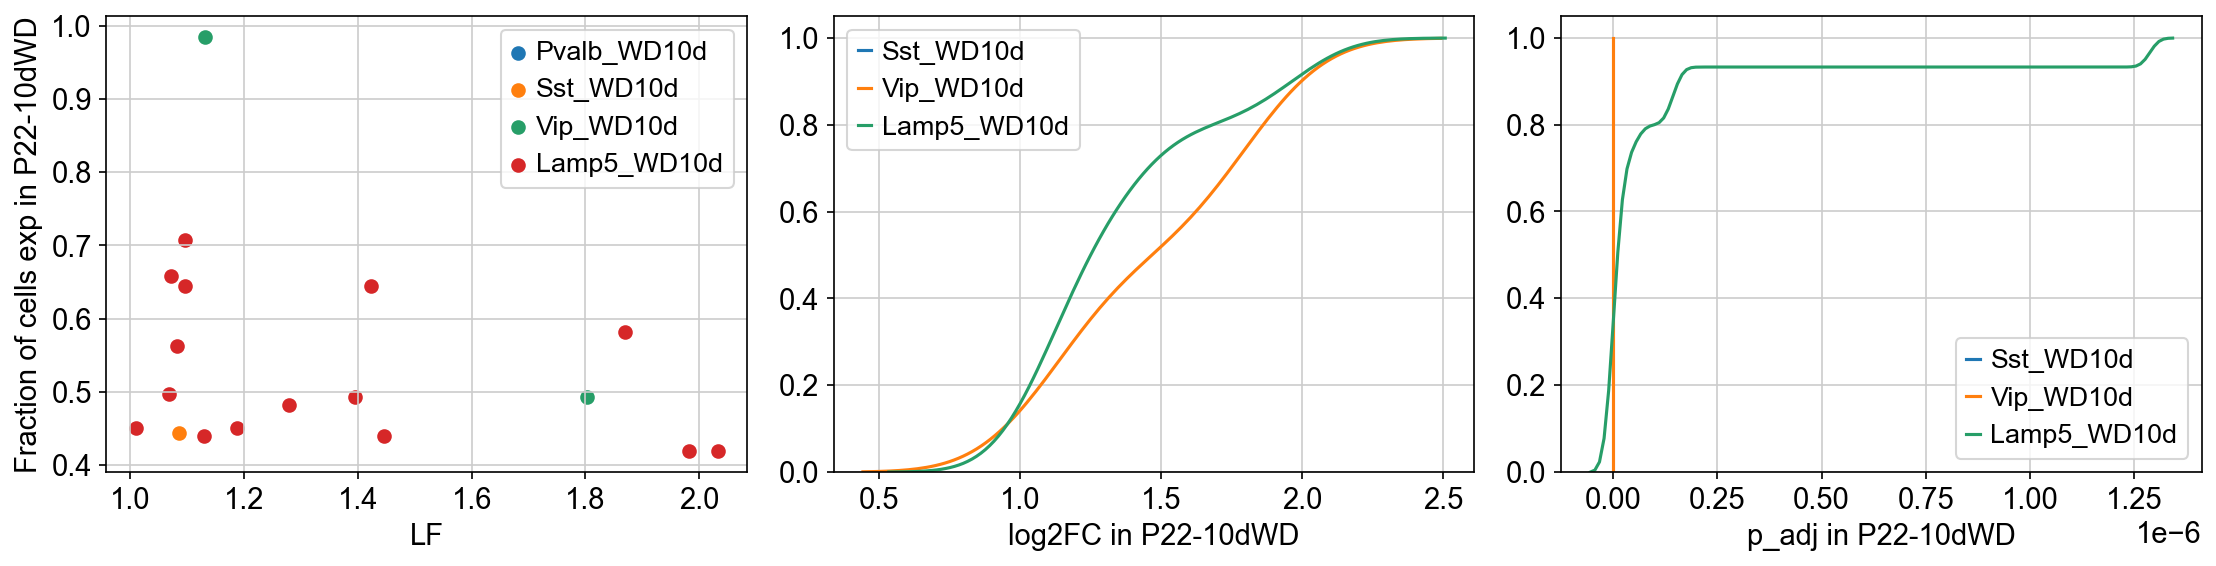

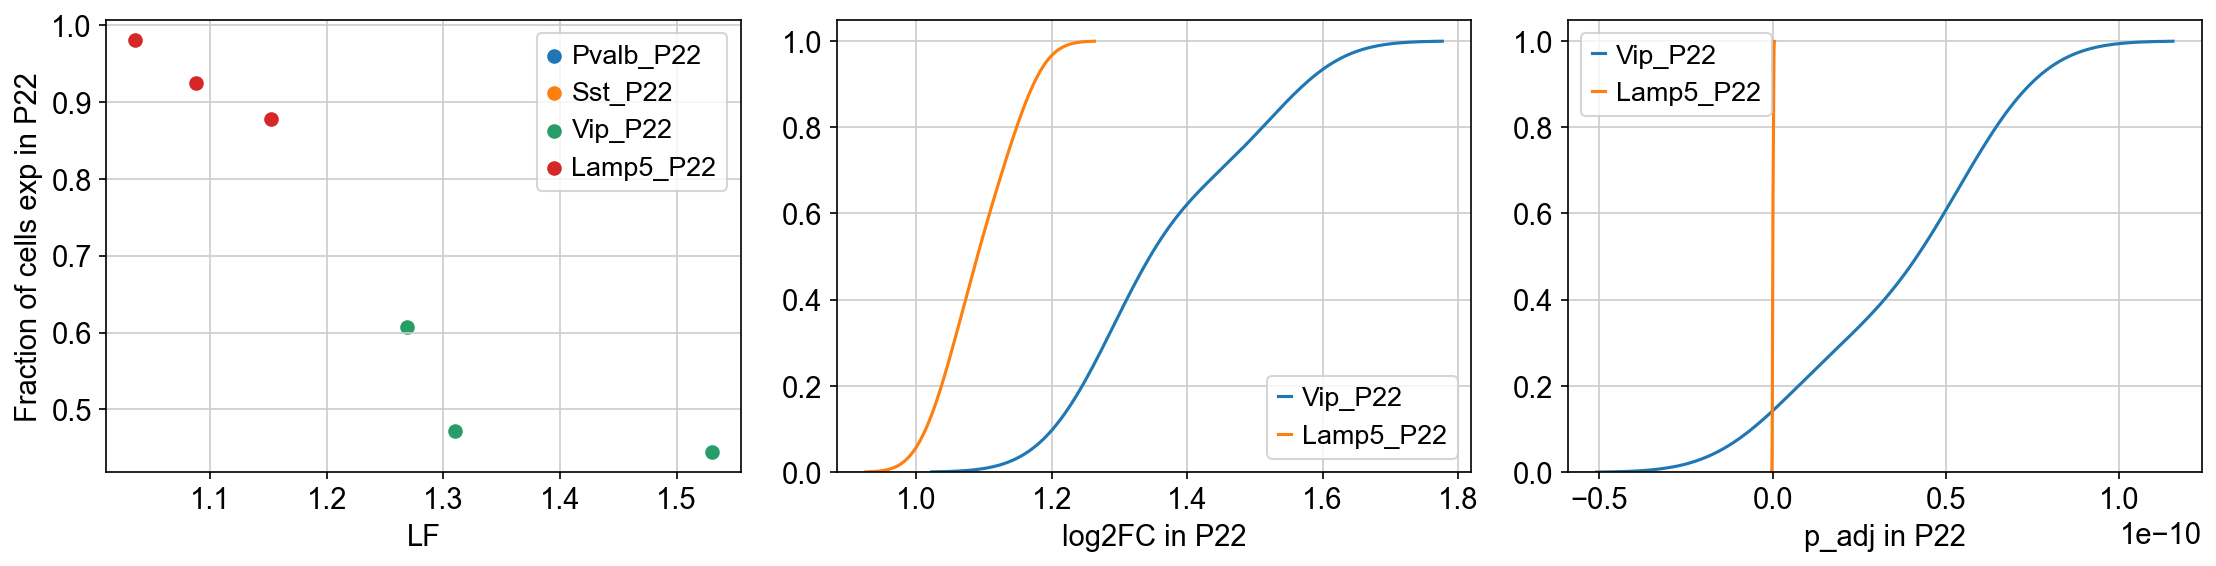

In [80]:
three_cdfs(dict_in=gaba_dict_WD10d, cond='P22-10dWD')
three_cdfs(dict_in=gaba_dict_P22, cond='P22')

In [81]:
for i in gluta_dict_WD10d:
    print(gluta_dict_WD10d[i].shape[0])

2
4
1
1
2
4
3
11


In [82]:
for i in gluta_dict_P22:
    print(gluta_dict_P22[i].shape[0])

0
0
0
0
0
0
0
2


## Overlap analysis WD10d>P22

%pip install UpSetPlot

In [83]:
import upsetplot
#from upsetplot import query, UpSet

In [84]:
gluta_WD10d = gluta_dict_WD10d.copy()
gluta_WD10d.update(gaba_dict_WD10d)

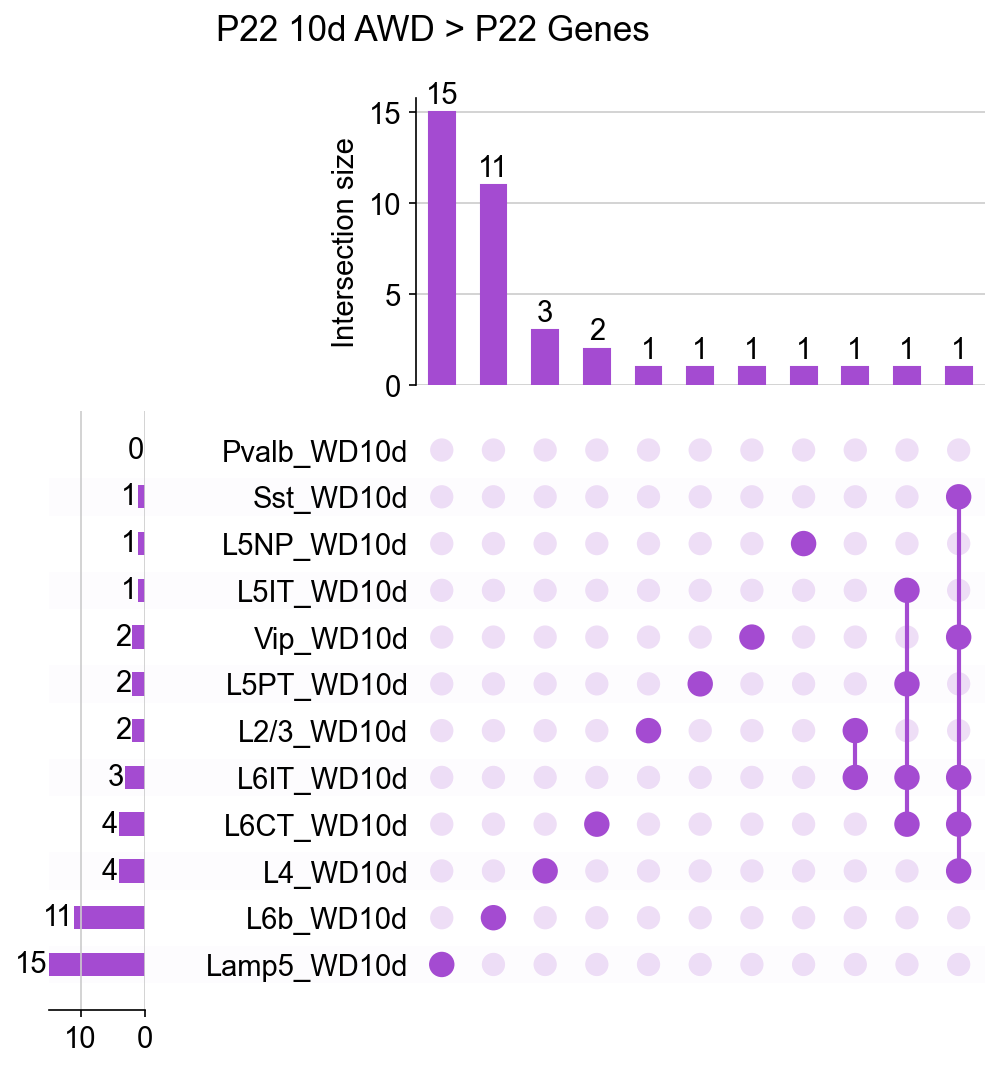

In [85]:
contents=dict()
for i in gluta_WD10d:
    contents[i]=list(gluta_WD10d[i].index)
a = upsetplot.from_contents(contents)
upsetplot.plot(a, sort_by='degree', show_counts=True,min_subset_size=1,
              facecolor='#A44BD1', shading_color=0.01,)
plt.suptitle('P22 10d AWD > P22 Genes')
plt.savefig('figures/UpSet_10d>P22.pdf')

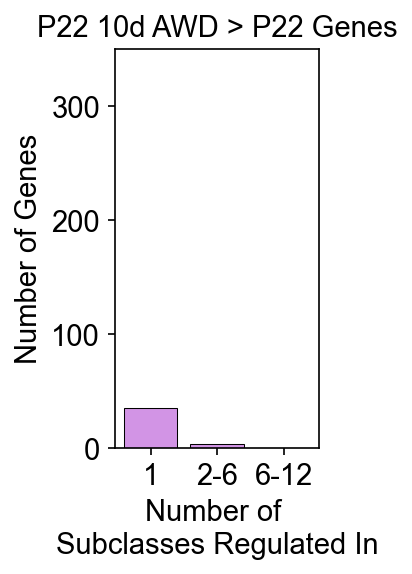

In [86]:
singular = []
medium = []
shared = []
for i in range(a.shape[0]):
    bool_array = a.iloc[i,:].name #bool for each subclass a gene is DE in. True
    gene_name = a.iloc[i,:].values[0]
    num_true = bool_array.count(True)
    if (num_true==1):
        singular.append(gene_name)
    elif (num_true in (2,3,4,5,6,)):
        medium.append(gene_name)
    else:
        shared.append(gene_name)

plt.figure(figsize=(1.75,3.5))
plt.bar(['1',
        '2-6', '6-12', ], [len(singular),len(medium), len(shared), ],
       color='#D294E5', linewidth=0.5, edgecolor='black')
plt.ylabel('Number of Genes')
plt.title('P22 10d AWD > P22 Genes')
plt.xlabel('Number of \nSubclasses Regulated In')
plt.grid(False)
plt.ylim([0,350])
plt.savefig('figures/10dWD>Ctrl_barplot.pdf', bbox_inches='tight')

### Inspect Lamp5

In [50]:
gaba[gaba.obs.batch=='P22'].obs['Subclass'].value_counts(), gaba[gaba.obs.batch=='P22-10dWD'].obs['Subclass'].value_counts()

(Pvalb    1389
 Sst       967
 Vip       710
 Lamp5     614
 Name: Subclass, dtype: int64,
 Pvalb    748
 Sst      579
 Lamp5    430
 Vip      260
 Name: Subclass, dtype: int64)

In [51]:
Lamp5_genes = []
for i in range(a.shape[0]):
    bool_array = a.iloc[i,:].name #bool for each subclass a gene is DE in. True
    gene_name = a.iloc[i,:].values[0]
    #All true if global gene
    if (bool_array==(False, False, False, False, False, False, False, False, False, False, False, True)):
        Lamp5_genes.append(gene_name)

In [52]:
L23_genes = []
for i in range(a.shape[0]):
    bool_array = a.iloc[i,:].name #bool for each subclass a gene is DE in. True
    gene_name = a.iloc[i,:].values[0]
    #All true if global gene
    if (bool_array==(True, False, False, False, False, False, False, False, False, False, False, False)):
        L23_genes.append(gene_name)

In [53]:
len(Lamp5_genes), len(L23_genes)

(15, 1)

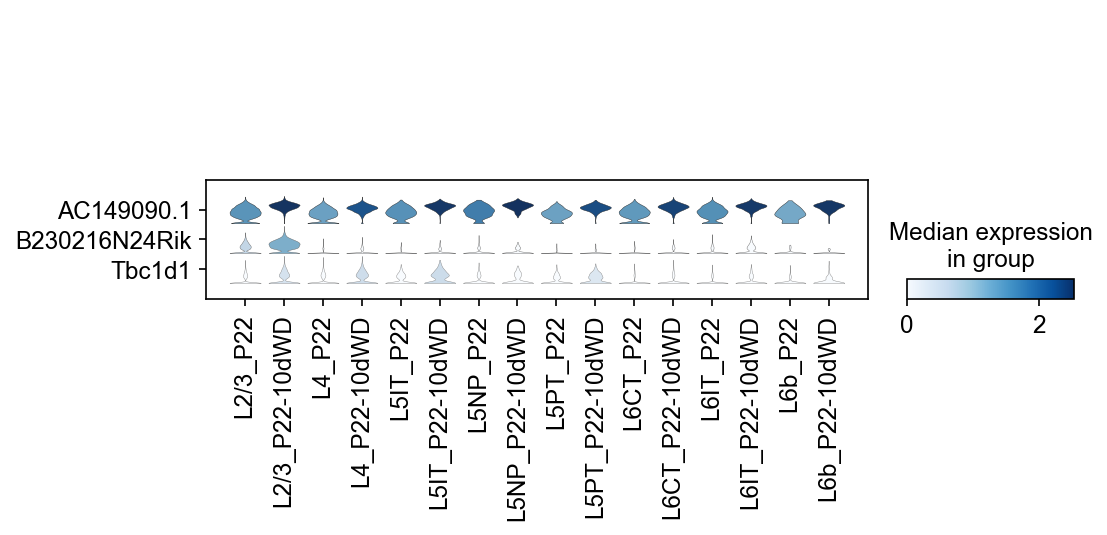

In [54]:
sc.pl.stacked_violin(gluta,var_names=gluta_dict_WD10d['L2/3_WD10d'].index, groupby='Subclass_age', swap_axes=True)


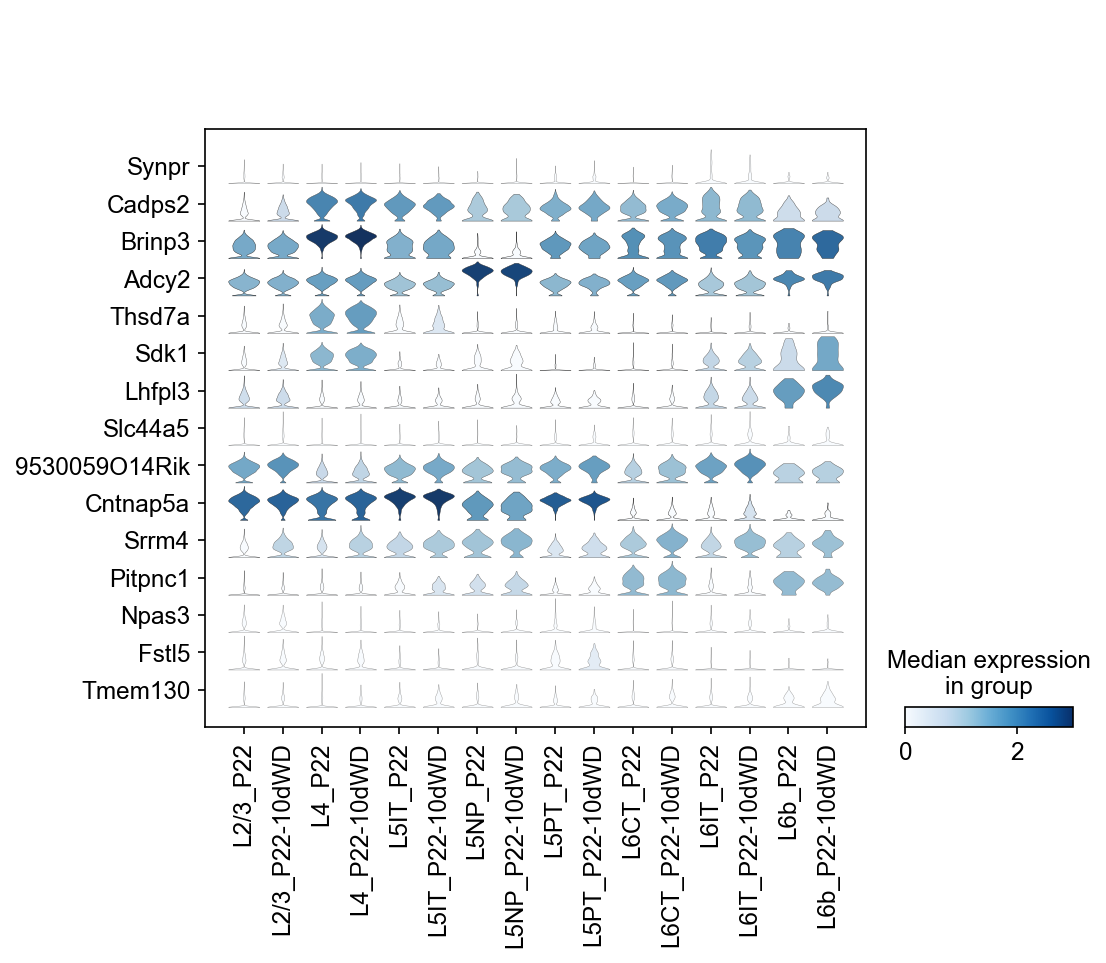

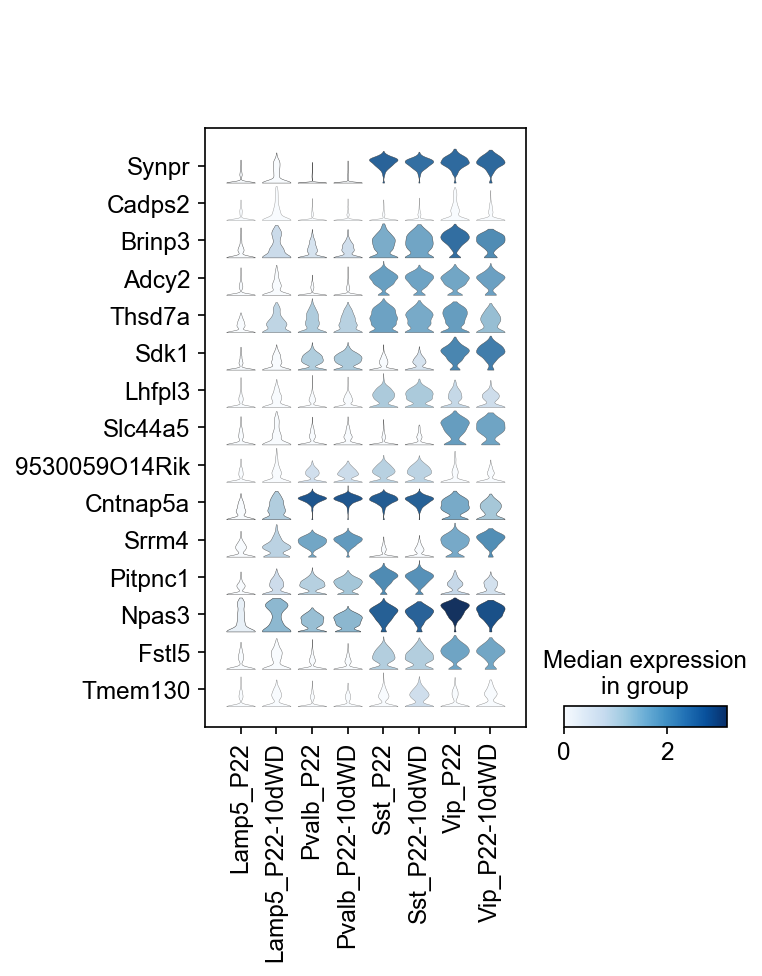

In [55]:
sc.pl.stacked_violin(gluta,var_names=Lamp5_genes, groupby='Subclass_age', swap_axes=True)
sc.pl.stacked_violin(gaba,var_names=Lamp5_genes, groupby='Subclass_age', swap_axes=True,save='Lamp5_38.pdf')

L2/3_WD10d
L4_WD10d
L5IT_WD10d
L5NP_WD10d
L5PT_WD10d
L6CT_WD10d
L6IT_WD10d
L6b_WD10d


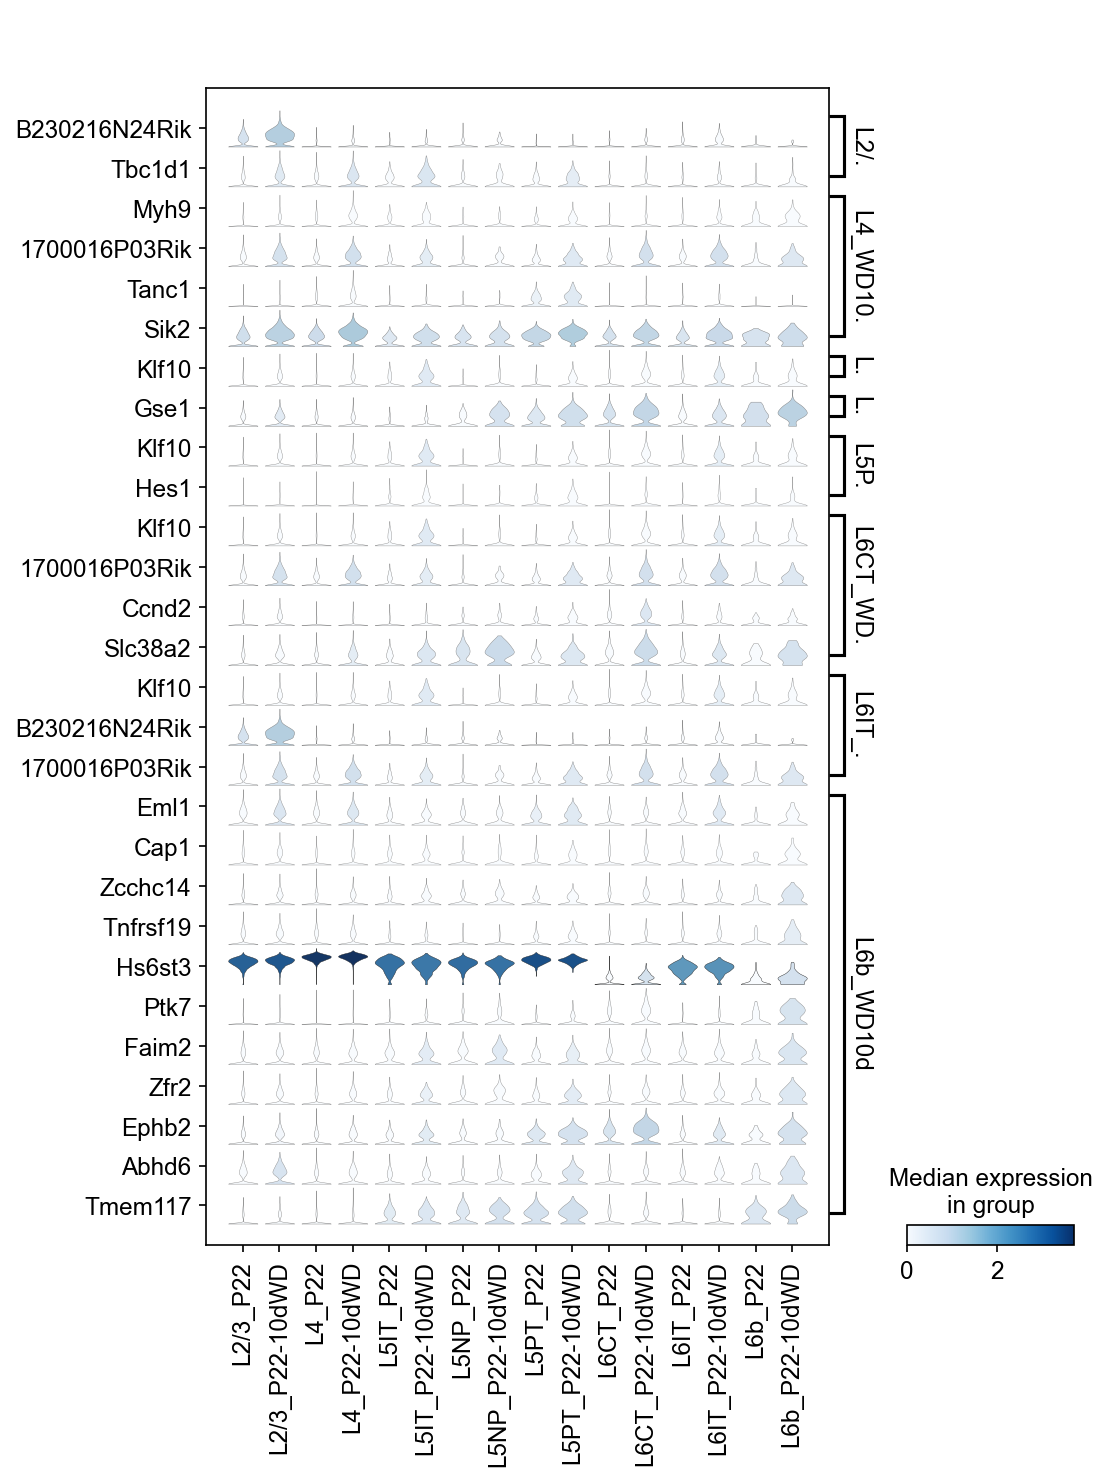

In [25]:
genes_dict = {}
genes_10d_glut = []
for i in gluta_dict_WD10d:
    genes_dict[i] = list(gluta_dict_WD10d[i].index)
    genes_10d_glut = genes_10d_glut + (list(gluta_dict_WD10d[i].index))
    print(i)
sc.pl.stacked_violin(gluta,var_names=genes_dict, 
                         groupby='Subclass_age', swap_axes=True,)

Pvalb_WD10d
Sst_WD10d
Vip_WD10d
Lamp5_WD10d


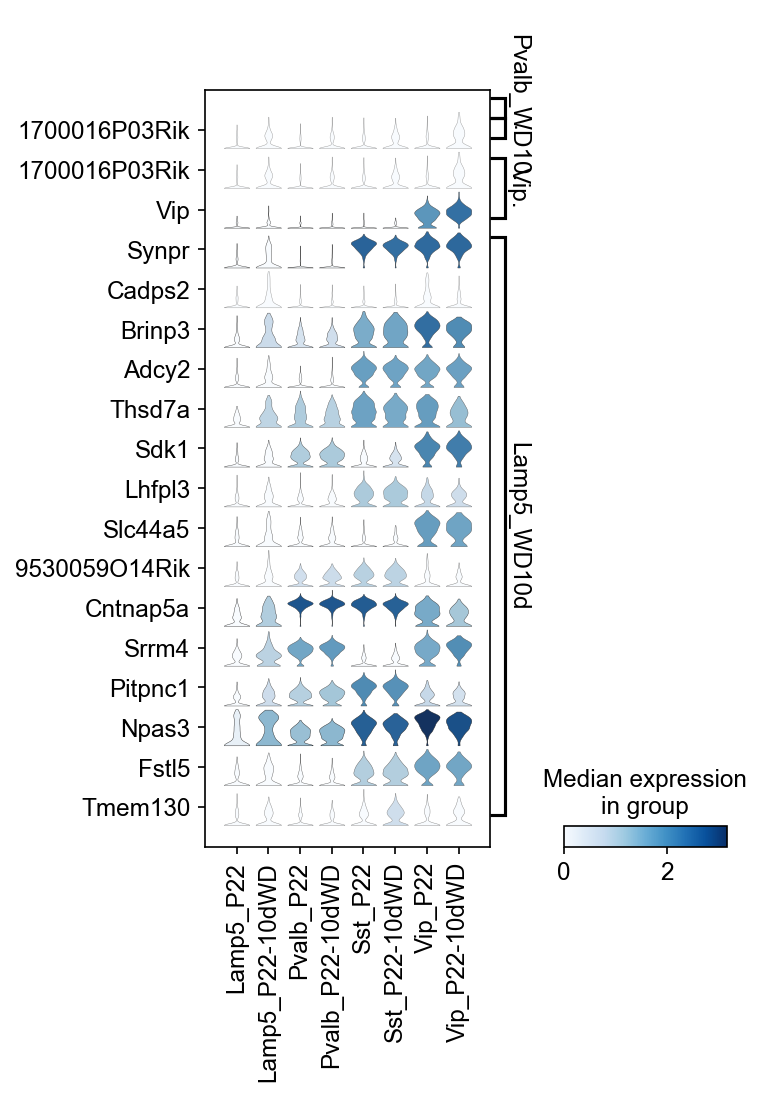

In [26]:
genes_dict = {}
genes_10d_gab = []
for i in gaba_dict_WD10d:
    genes_dict[i] = list(gaba_dict_WD10d[i].index)
    genes_10d_gab = genes_10d_gab + list(gaba_dict_WD10d[i].index)
    print(i)
sc.pl.stacked_violin(gaba,var_names=genes_dict, 
                         groupby='Subclass_age', swap_axes=True,var_group_rotation=45)

## Overlap analysis P22>WD10d

In [121]:
gluta_P22 = gluta_dict_P22.copy()

In [122]:
gluta_P22.update(gaba_dict_P22)

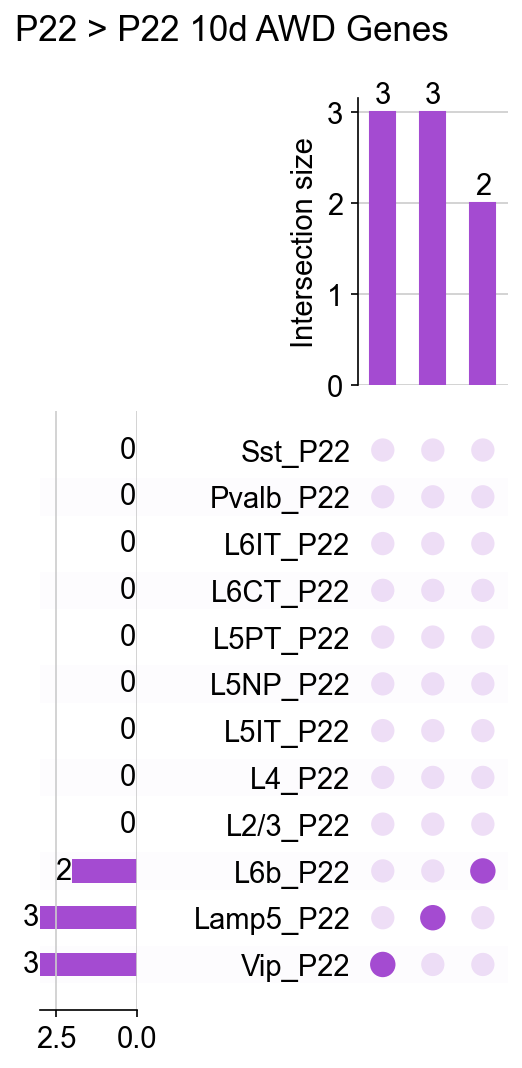

In [123]:
contents=dict()
for i in gluta_P22:
    contents[i]=list(gluta_P22[i].index)
a = upsetplot.from_contents(contents)

upsetplot.plot(a, sort_by='degree', show_counts=True, min_subset_size=2,facecolor='#A44BD1', 
               shading_color=0.01,)
plt.suptitle('P22 > P22 10d AWD Genes')
plt.savefig('figures/UpSet_10d<P22.pdf')

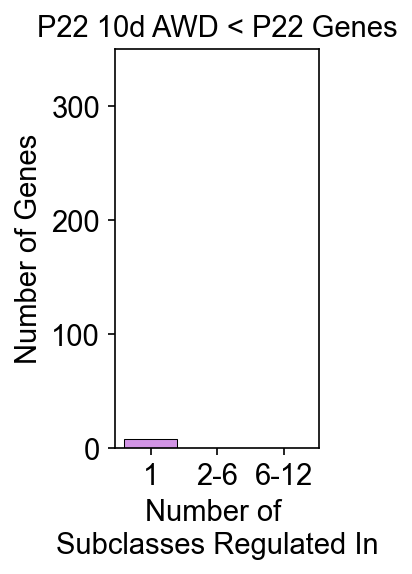

In [124]:
singular = []
medium = []
shared = []
for i in range(a.shape[0]):
    bool_array = a.iloc[i,:].name #bool for each subclass a gene is DE in. True
    gene_name = a.iloc[i,:].values[0]
    num_true = bool_array.count(True)
    if (num_true==1):
        singular.append(gene_name)
    elif (num_true in (2,3,4,5,6,)):
        medium.append(gene_name)
    else:
        shared.append(gene_name)

plt.figure(figsize=(1.75,3.5))
plt.bar(['1',
        '2-6', '6-12', ], [len(singular),len(medium), len(shared), ],
       color='#D294E5', linewidth=0.5, edgecolor='black')
plt.ylabel('Number of Genes')
plt.title('P22 10d AWD < P22 Genes')
plt.xlabel('Number of \nSubclasses Regulated In')
plt.grid(False)
plt.ylim([0,350])
plt.savefig('figures/10dWD<Ctrl_barplot.pdf', bbox_inches='tight')

L2/3_P22 0
L4_P22 0
L5IT_P22 0
L5NP_P22 0
L5PT_P22 0
L6CT_P22 0
L6IT_P22 0
L6b_P22 2


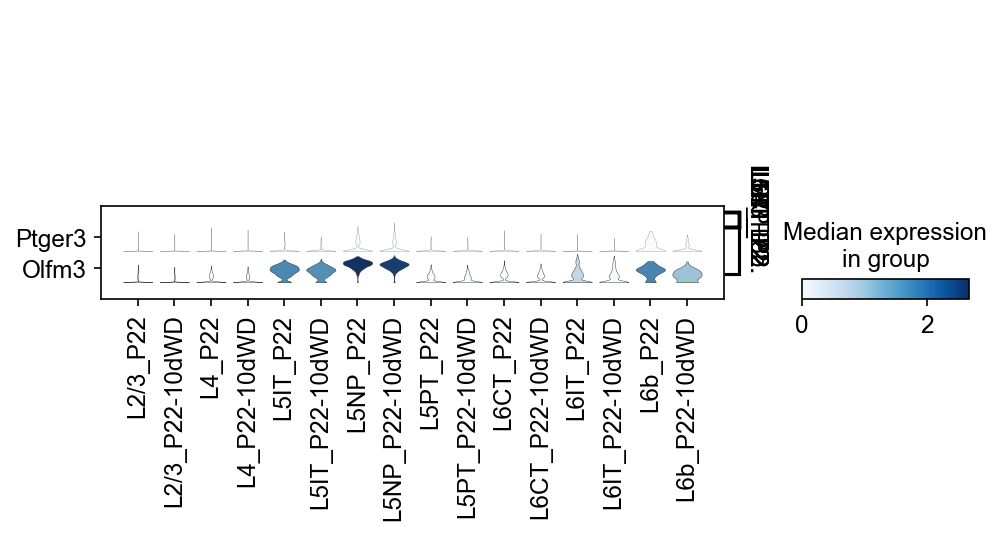

In [27]:
genes_dict = {}
genes_P22_glut = []
for i in gluta_dict_P22:
    genes_dict[i] = list(gluta_dict_P22[i].index)
    genes_P22_glut = genes_P22_glut + list(gluta_dict_P22[i].index)
    print(i, len(genes_dict[i]))
sc.pl.stacked_violin(gluta,var_names=genes_dict, 
                         groupby='Subclass_age', swap_axes=True,)



Pvalb_P22 0
Sst_P22 0
Vip_P22 3
Lamp5_P22 3


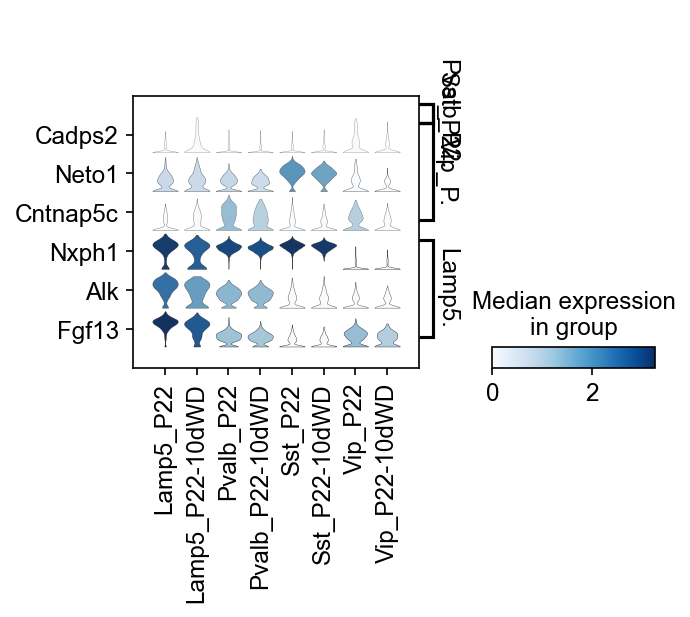

In [28]:
genes_dict = {}
genes_P22_gab = []
for i in gaba_dict_P22:
    genes_dict[i] = list(gaba_dict_P22[i].index)
    genes_P22_gab = genes_P22_gab + list(gaba_dict_P22[i].index)
    print(i, len(genes_dict[i]))
sc.pl.stacked_violin(gaba,var_names=genes_dict, 
                         groupby='Subclass_age', swap_axes=True,)

## Heatmaps of LfC

Need to re-run DE with no LFC thresh so that we can know the LFC for non-DE genes

In [29]:
gluta_dict_WD10d = dict()
for i in ['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',]:
    df = DE(gluta[gluta.obs['Subclass']==i,:], obs_id='batch', 
                               obs_id_test='P22-10dWD', ref='rest', pts_thresh=0.4, lf_thresh=0)
    #df = df[df['LF']<4]
    gluta_dict_WD10d[i+'_WD10d'] = df[df['p_adj']<0.05]
    #gluta_dict_WD10d[i+'_WD10d'] = df

del df
gluta_dict_P22 = dict()
for i in ['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',]:

    df = DE(gluta[gluta.obs['Subclass']==i,:], obs_id='batch', 
                              obs_id_test='P22', ref='rest', pts_thresh=0.4, lf_thresh=0)
    
    #df = df[df['LF']<4]
    gluta_dict_P22[i+'_P22'] = df[df['p_adj']<0.05]
    #gluta_dict_P22[i+'_P22'] = df

gaba_dict_WD10d = dict()
for i in ['Pvalb', 'Sst', 'Vip', 'Lamp5']:
    df = DE(gaba[gaba.obs['Subclass']==i,:], obs_id='batch', 
                               obs_id_test='P22-10dWD', ref='rest', pts_thresh=0.4, lf_thresh=0)
    #df = df[df['LF']<4]
    gaba_dict_WD10d[i+'_WD10d'] = df[df['p_adj']<0.05]
    #gaba_dict_WD10d[i+'_WD10d'] = df
    
del df

gaba_dict_P22 = dict()
for i in ['Pvalb', 'Sst', 'Vip', 'Lamp5']:
    df = DE(gaba[gaba.obs['Subclass']==i,:], obs_id='batch', 
                              obs_id_test='P22', ref='rest', pts_thresh=0.4, lf_thresh=0)  
    #df = df[df['LF']<4]
    gaba_dict_P22[i+'_P22'] = df[df['p_adj']<0.05]
    #gaba_dict_P22[i+'_P22'] = df

cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
35 44
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
24 303
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
4 86
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
68 69
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level


In [30]:
def LF_hmap(input_dict, hmap_cols, gene_list):

    out_dict = {}
    for g in gene_list:
        out_dict[g] = []
        for i in input_dict:
            df = input_dict[i]

            if(g in df.index):
                out_dict[g].append(input_dict[i].loc[g]['LF'])
            else:
                out_dict[g].append(0)
                
    out_df = pd.DataFrame(data=out_dict).transpose()
    out_df.columns = list(input_dict.keys())

    df_plt = pd.DataFrame(out_df.to_numpy(), index=gene_list, 
                 columns=hmap_cols)
    return df_plt

In [31]:
def remove_duplicates(input_list):
    seen = set()
    return [x for x in input_list if not (x in seen or seen.add(x))]

In [32]:
len(set(genes))

NameError: name 'genes' is not defined

Text(0.5, 1.0, 'P22 10d AWD > P22 Genes')

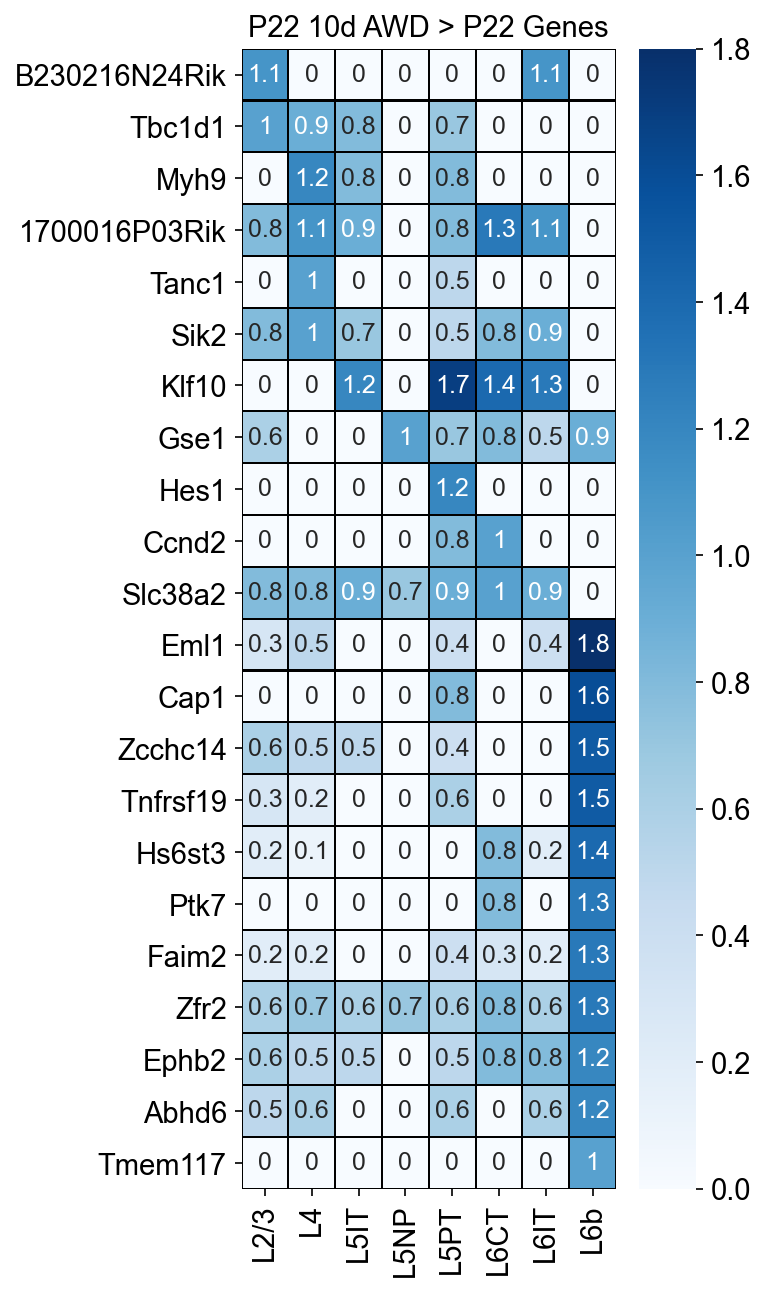

In [33]:
tenD_glut = LF_hmap(input_dict=gluta_dict_WD10d, 
                    hmap_cols=['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',], 
        gene_list=remove_duplicates(genes_10d_glut))

plt.figure(figsize=(4,10))
sn.heatmap(np.round(tenD_glut, 1), xticklabels=True, yticklabels=True, cmap='Blues', 
           linewidths=0.5, vmin=0,linecolor='black', annot=True, annot_kws={'fontsize':12})
plt.title('P22 10d AWD > P22 Genes')
plt.savefig('figures/hmap_10d>P22_genes.pdf', bbox_inches='tight')

In [34]:
gaba_dict_WD10d.keys()

dict_keys(['Pvalb_WD10d', 'Sst_WD10d', 'Vip_WD10d', 'Lamp5_WD10d'])

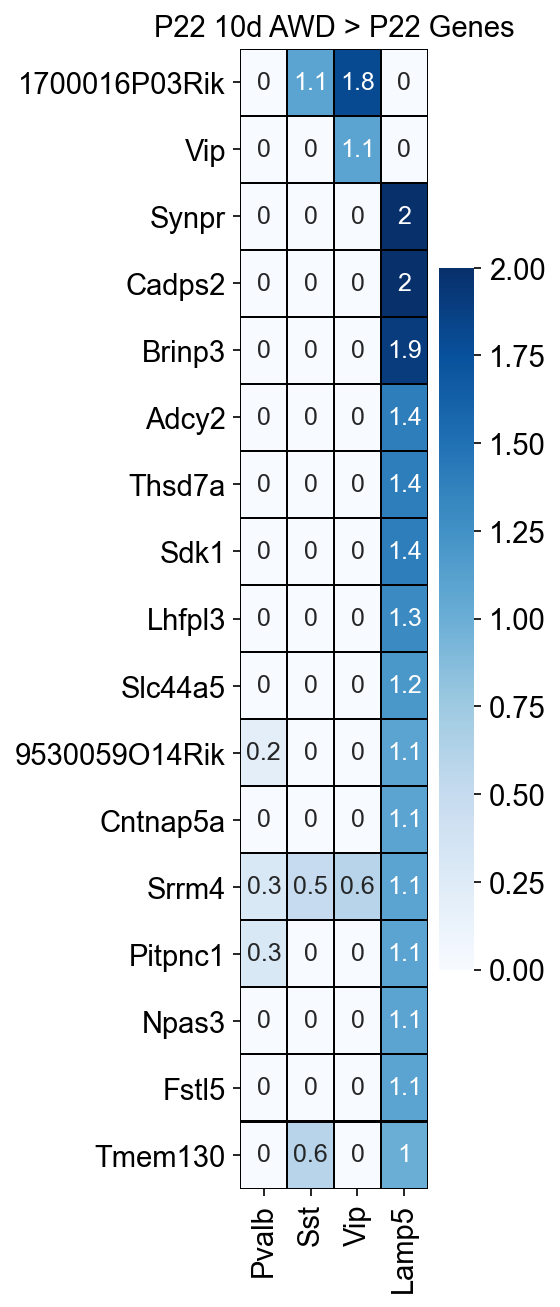

In [143]:
tenD_gab = LF_hmap(input_dict=gaba_dict_WD10d, 
                    hmap_cols=['Pvalb', 'Sst', 'Vip', 'Lamp5'], 
        gene_list=remove_duplicates(genes_10d_gab))

plt.figure(figsize=(2,10))
sn.heatmap(np.round(tenD_gab, 1), xticklabels=True, yticklabels=True, cmap='Blues', 
           linewidths=0.5, vmin=0,linecolor='black', annot=True, annot_kws={'fontsize':12})
plt.title('P22 10d AWD > P22 Genes')
plt.savefig('figures/hmap_10d>P22_genes_gab.pdf', bbox_inches='tight')

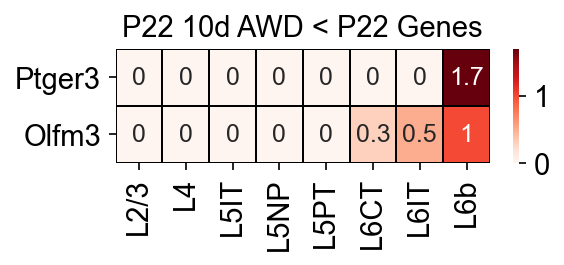

In [35]:
p22_glut = LF_hmap(input_dict=gluta_dict_P22, 
                    hmap_cols=['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',], 
        gene_list=remove_duplicates(genes_P22_glut))

plt.figure(figsize=(4,1))
sn.heatmap(np.round(p22_glut, 1), xticklabels=True, yticklabels=True, cmap='Reds', 
           linewidths=0.5, vmin=0,linecolor='black', annot=True, annot_kws={'fontsize':12})
plt.title('P22 10d AWD < P22 Genes')
plt.savefig('figures/hmap_10d<P22_genes.pdf', bbox_inches='tight')

In [ ]:
tenD_glut = LF_hmap(input_dict=gluta_dict_WD10d, 
                    hmap_cols=['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',], 
        gene_list=remove_duplicates(genes_10d_glut))

plt.figure(figsize=(4,10))
sn.heatmap(np.round(tenD_glut, 1), xticklabels=True, yticklabels=True, cmap='Blues', 
           linewidths=0.5, vmin=0,linecolor='black', annot=True, annot_kws={'fontsize':12})
plt.title('P22 10d AWD > P22 Genes')
plt.savefig('figures/hmap_10d>P22_genes.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'P22 10d AWD > P22 Genes')

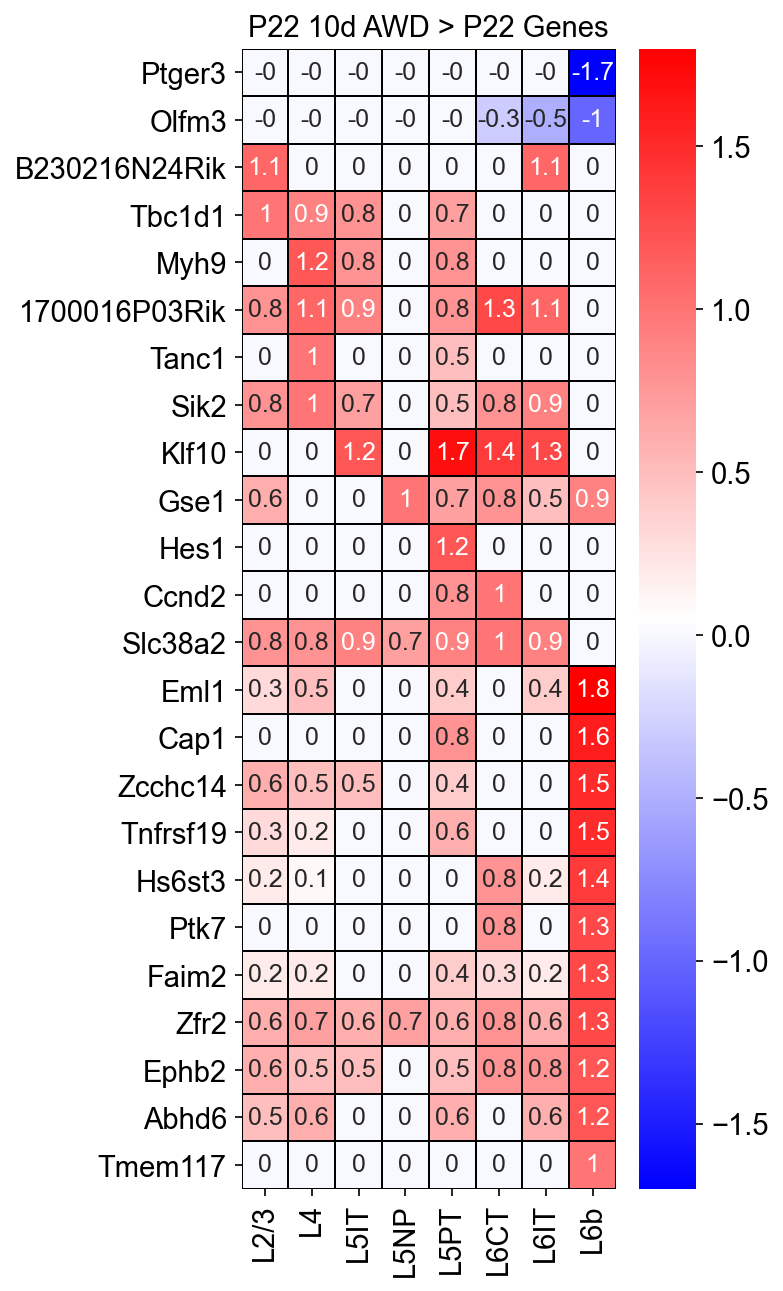

In [154]:

plt.figure(figsize=(4,10))
sn.heatmap(np.round(pd.concat([-1*p22_glut,tenD_glut])
, 1), xticklabels=True, yticklabels=True, cmap='bwr', 
           linewidths=0.5,linecolor='black', annot=True, annot_kws={'fontsize':12})
plt.title('P22 10d AWD > P22 Genes')

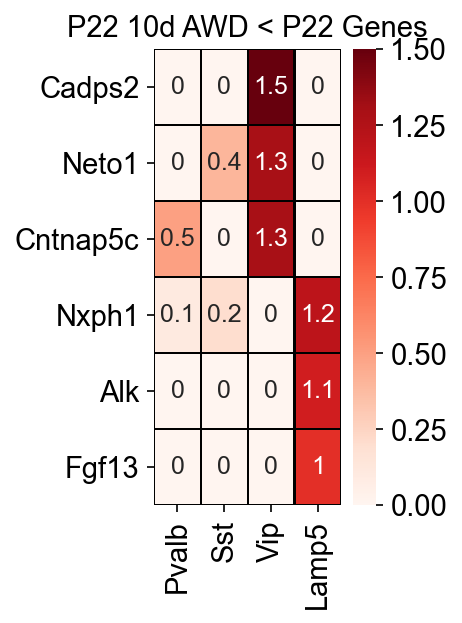

In [36]:
p22_gab = LF_hmap(input_dict=gaba_dict_P22, 
                    hmap_cols=['Pvalb', 'Sst', 'Vip', 'Lamp5'], 
        gene_list=remove_duplicates(genes_P22_gab))

plt.figure(figsize=(2,4))
sn.heatmap(np.round(p22_gab, 1), xticklabels=True, yticklabels=True, cmap='Reds', 
           linewidths=0.5, vmin=0,linecolor='black', annot=True, annot_kws={'fontsize':12})
plt.title('P22 10d AWD < P22 Genes')
plt.savefig('figures/hmap_10d<P22_genes_gab.pdf', bbox_inches='tight')

## Output Tables

In [21]:
glugab_WD10d = gluta_dict_WD10d.copy()
glugab_WD10d.update(gaba_dict_WD10d)

In [24]:
glugab22 = gluta_dict_P22.copy()
glugab22.update(gaba_dict_P22)

In [25]:
import pandas as pd
import re

def sanitize_sheet_name(sheet_name):
    # Replace invalid characters with an underscore or another character of your choice
    sanitized_name = re.sub(r'[\\/*?:\[\]]', '_', sheet_name)
    # Optionally, limit the length of the sheet name to 31 characters
    return sanitized_name[:31]

file_path = 'Tables/TableS5.xlsx'

with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    for sheet_name, df in glugab_WD10d.items():
        sanitized_name = sanitize_sheet_name(sheet_name+'>P22')
        df.columns = ["Percent Cells Expressing", 'log2fold-change'] + df.columns.tolist()[2:]
        df.to_excel(writer, sheet_name=sanitized_name, index=True)
    for sheet_name, df in glugab22.items():
        # Sanitize the sheet name before writing
        sanitized_name = sanitize_sheet_name(sheet_name+'>WD10d')
        # Change the first column name to "Percent Cells Expressing"
        df.columns = ["Percent Cells Expressing", 'log2fold-change'] + df.columns.tolist()[2:]
        # Write the DataFrame to the corresponding sheet
        df.to_excel(writer, sheet_name=sanitized_name, index=True)